In [133]:
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np
import csv
from scipy.sparse.csgraph import floyd_warshall

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2), (1, 3), (2, 3), (3, 4), (4, 6), (4, 5), (6, 7), (7, 8), (8, 9), (9, 10)]


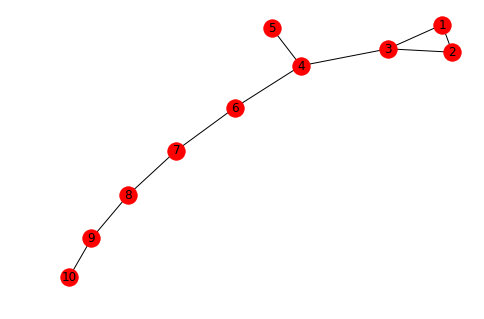

In [63]:
#add nodes and edges
G = nx.Graph()

G.add_node(1, weight = 1000)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_nodes_from([7, 8, 9, 10])
print(G.nodes)

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)
G.add_edge(4,6)
G.add_edge(5,4)
G.add_edge(2,3)

G.add_edges_from([(6, 7),(7, 8),(8, 9),(9, 10)])
print(G.edges)


nx.draw(G, with_labels = 1)
plt.show()


In [69]:
#auto nodes/edgde generator
Z = nx.complete_graph(4)
print(Z.nodes())

[0, 1, 2, 3]


In [58]:
print(Z.edges())


[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [70]:
Z.order()


4

In [71]:
Z.size()

6

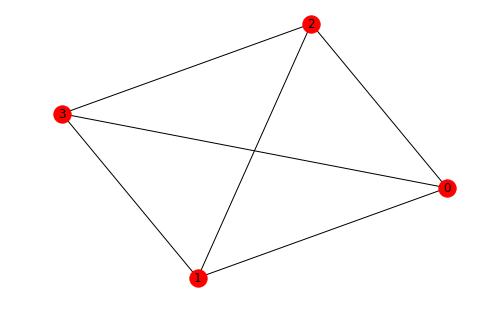

In [72]:
nx.draw(Z, with_labels = 1)
plt.show()


In [77]:
# floyd Warshall shortest path matrix
nx.floyd_warshall(Z)


{0: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {0: 0, 1: 1.0, 2: 1.0, 3: 1.0}),
 1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0, 0: 1.0, 2: 1.0, 3: 1.0}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {2: 0, 0: 1.0, 1: 1.0, 3: 1.0}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {3: 0, 0: 1.0, 1: 1.0, 2: 1.0})}

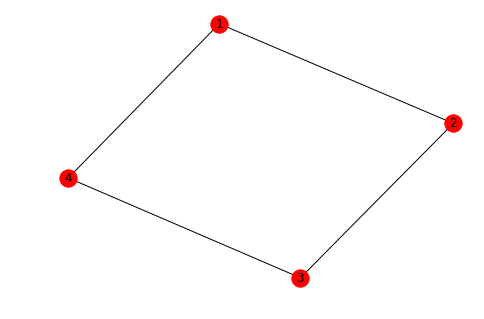

In [130]:
#nodes with labels
A = nx.Graph()
A.add_nodes_from([1, 2, 3, 4])
A.add_edges_from([(1, 2),(2, 3),(3, 4), (1, 4)])
nx.draw(A, with_labels = 1)
plt.show()

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


{(1, 2): Text(4.5, 3.5, '50'),
 (1, 4): Text(2.5, 2.0, '1000'),
 (2, 3): Text(3.0, 3.5, '500'),
 (3, 4): Text(1.0, 2.0, '200')}

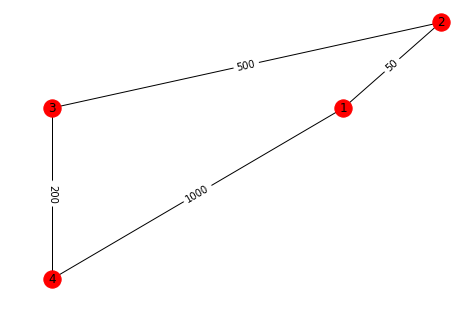

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


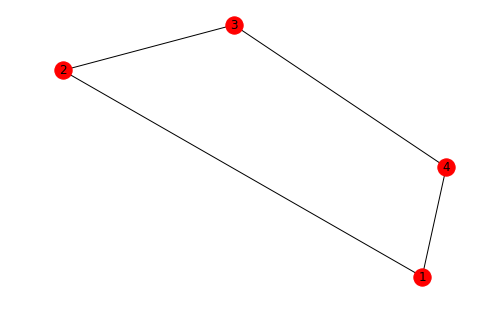

In [233]:
#write edgelist

B = nx.Graph()

B.add_weighted_edges_from([(1, 2, 50),(2, 3, 500),(3, 4, 200),(1, 4, 1000)])

nx.write_edgelist(B, "edgelistB.txt")

D = nx.read_edgelist("edgelistC.txt")

#show imported edgelist
print(nx.info(D))

plt.figure()

nx.draw(D, with_labels = True)

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


D:\Program Files (x86)\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(1, 2): Text(5.5, 3.5, '5'),
 (1, 4): Text(2.5, 1.5, '100'),
 (2, 3): Text(3.5, 3.5, '50'),
 (3, 4): Text(0.5, 1.5, '20')}

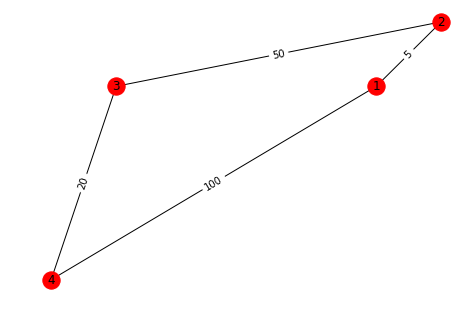

In [48]:
#show weighted edges on graph
C = nx.Graph()

C.add_node(1, pos=(5,3))
C.add_node(2, pos=(6,4))
C.add_node(3, pos=(1,3))
C.add_node(4, pos=(0,0))

C.add_edge(1, 2, weight = 5)
C.add_edge(2, 3, weight = 50)
C.add_edge(3, 4, weight = 20)
C.add_edge(1, 4, weight = 100)

#C.add_weighted_edges_from([(1, 2, 50),(2, 3, 500),(3, 4, 200),(1, 4, 1000)])
nx.write_edgelist(C, "edgelistC.csv")

#C = nx.read_edgelist("edgelist.txt")

weight = nx.get_edge_attributes(C, "weight")
pos = nx.get_node_attributes(C, "pos")

print(nx.info(C))

plt.figure()

nx.draw(C, pos, with_labels = True)
nx.draw_networkx_edge_labels(C, pos, edge_labels = weight)

In [240]:
#run floyd warshall shortest path
nx.floyd_warshall(C)

{1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0, 2: 5, 4: 75, 3: 55}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {2: 0, 1: 5, 3: 50, 4: 70}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {3: 0, 2: 50, 4: 20, 1: 55}),
 4: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {4: 0, 1: 75, 3: 20, 2: 70})}

In [43]:
# import csv as list of list

f = open("D:\Homework\Planetmaker\Future Models\Data\Countries Dummy2.csv", "r")
country_list = list(csv.reader(f))
country_list = country_list[1:]

print(country_list)

# convert to numpy array
country = np.array(country_list)
print(country)

# delete first column
country = np.array(country[:,1:])
print(country)


[['NED', '1', '100', '90', '1', '2', '5'], ['GER', '2', '500', '550', '2', '3', '50'], ['MEX', '3', '50', '60', '3', '4', '20'], ['USA', '4', '1000', '900', '4', '1', '100']]
[['NED' '1' '100' '90' '1' '2' '5']
 ['GER' '2' '500' '550' '2' '3' '50']
 ['MEX' '3' '50' '60' '3' '4' '20']
 ['USA' '4' '1000' '900' '4' '1' '100']]
[['1' '100' '90' '1' '2' '5']
 ['2' '500' '550' '2' '3' '50']
 ['3' '50' '60' '3' '4' '20']
 ['4' '1000' '900' '4' '1' '100']]


In [77]:
# index 3 and 4 to form a path
# index 5 are the weights of the edges

origin = country[:,3]
destination = country[:,4]
weight = country[:,5]

print(origin)
print(destination)
print(weight)



['1' '2' '3' '4']
['2' '3' '4' '1']
['5' '50' '20' '100']


In [114]:
# matrix of path
# output is a pretty print

"""
graph:
         A--5--B 
        /     /
      100    50
      /     /  
     D--20-C

 """
INF = 999999
matrix_path = [[0, 5, INF, 100], 
               [5, 0, 50, INF],
               [INF, 50, 0, 20],
               [100, INF, 20, 0]]

def floyd_warshall(vertex, adjacency_matrix):
    # calculating all pair shortest path
    for k in range(0, vertex):
        for i in range(0, vertex):
            for j in range(0, vertex):
                # relax the distance from i to j by allowing vertex k as intermediate vertex
                # consider which one is better, going through vertex k or the previous value
                adjacency_matrix[i][j] = min(adjacency_matrix[i][j], adjacency_matrix[i][k] + adjacency_matrix[k][j])
    # pretty print the graph
    # o/d means the leftmost row is the origin vertex
    # and the topmost column as destination vertex
    print("o/d", end='')
    for i in range(0, vertex):
        print("\t{:d}".format(i+1), end='')
    print();
    for i in range(0, vertex):
        print("{:d}".format(i+1), end='')
        for j in range(0,vertex):
            print("\t{:d}".format(adjacency_matrix[i][j]), end='')
        print();
        
floyd_warshall(4, matrix_path);



o/d	1	2	3	4
1	0	5	55	75
2	5	0	50	70
3	55	50	0	20
4	75	70	20	0


In [126]:
# example Floyd Warshall Shortest Path

""""
INF = 1000000000
def floyd_warshall(vertex, adjacency_matrix):
    # calculating all pair shortest path
    for k in range(0, vertex):
        for i in range(0, vertex):
            for j in range(0, vertex):
                # relax the distance from i to j by allowing vertex k as intermediate vertex
                # consider which one is better, going through vertex k or the previous value
                adjacency_matrix[i][j] = min(adjacency_matrix[i][j], adjacency_matrix[i][k] + adjacency_matrix[k][j])
    # pretty print the graph
    # o/d means the leftmost row is the origin vertex
    # and the topmost column as destination vertex
    print("o/d", end='')
    for i in range(0, vertex):
        print("\t{:d}".format(i+1), end='')
    print();
    for i in range(0, vertex):
        print("{:d}".format(i+1), end='')
        for j in range(0,vertex):
            print("\t{:d}".format(adjacency_matrix[i][j]), end='')
        print();
#input is given as adjacency matrix,
#input represents this undirected graph
# A--1--B
# |    /
# 3   /
# |  1
# | /
# C--2--D
#should set infinite value for each pair of vertex that has no edge
adjacency_matrix = [
                    [  0,   1, 3, INF],
                    [  1,   0, 1, INF],
                    [  3,   1, 0,   2],
                    [INF, INF, 2,   0]
                    ]
floyd_warshall(4, adjacency_matrix);

""""


SyntaxError: EOL while scanning string literal (<ipython-input-126-5ff0cd785319>, line 42)

In [134]:
# using SciPy for Floyd Warshall shortest path
# output is an array

matrix_path = [[0, 5, inf, 100], 
               [5, 0, 50, inf],
               [inf, 50, 0, 20],
               [100, inf, 20, 0]]

floyd_warshall(matrix_path)

shortest_path_matrix = floyd_warshall(matrix_path)
print(shortest_path_matrix)

[[ 0.  5. 55. 75.]
 [ 5.  0. 50. 70.]
 [55. 50.  0. 20.]
 [75. 70. 20.  0.]]


In [ ]:
# simple the gravity model using GDP as masses
# m vector of masses of countries
# go to next python file
